In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_score, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pickle

In [53]:
AU_dataset = pd.read_csv('C:/Users/Rohit/Desktop/Deakin Assignments/Trimester 2 - March/Team Project Management - A/Project/companyandngo/Data/Datasets/AUFinal.csv')
AU_dataset

,Date,AORD_monthly_adj_closed,10Y_Bond_Yields,3M_Bond_Yields,3M_10Y_Treasury_Spread,Unemployment_Rate,Recession,Recession_within_6M,Recession_within_12M,Recession_within_24M
0,2/01/2020,6511.500000,0.98,0.89,0.09,5.097311,0,0,0,0
1,1/01/2020,7121.200195,1.15,0.89,0.26,5.290084,0,0,0,0
2,12/01/2019,6802.399902,1.20,0.90,0.30,5.062629,0,0,0,0
3,11/01/2019,6948.000000,1.15,0.91,0.24,5.171340,0,0,0,0
4,10/01/2019,6772.899902,1.03,0.88,0.15,5.302068,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
422,12/01/1984,726.099976,13.40,12.34,1.06,8.520384,0,0,1,0
423,11/01/1984,749.000000,13.25,11.26,1.99,8.679548,0,0,1,0
424,10/01/1984,749.000000,13.20,11.17,2.03,8.695913,0,0,1,0
425,9/01/1984,733.500000,13.10,10.53,2.57,8.735682,0,0,1,0


In [54]:
recession_6m = AU_dataset['Recession_within_6M']
recession_12m = AU_dataset['Recession_within_12M']
recession_24m = AU_dataset['Recession_within_24M']

date = AU_dataset['Date']

features = ['Date', 'AORD_monthly_adj_closed', '10Y_Bond_Yields', '3M_Bond_Yields',
                         '3M_10Y_Treasury_Spread', 'Unemployment_Rate', 'Recession',
                         'Recession_within_6M',
                         'Recession_within_12M', 'Recession_within_24M']

recession = AU_dataset[features]

In [55]:
svm_model_au = SVC(kernel = 'linear', probability = True)

In [56]:
#6 months

X_train, X_test, y_train, y_test = train_test_split(recession.iloc[:,1:6], recession_6m, test_size=0.3, random_state=10)
svm_model_au.fit(X_train, y_train)
Pred_6M = svm_model_au.predict(X_test)
Pred_6M 

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
      dtype=int64)

In [57]:
#evaluating model

print("Accuracy is:", metrics.accuracy_score(y_test, Pred_6M))
prediction_6month = pd.DataFrame(svm_model_au.predict_proba(X_test)[:,1])
ROC_AUC = roc_auc_score(y_test, prediction_6month)
ROC_AUC
svm_6month_recession = pd.DataFrame(prediction_6month)
svm_6month_recession
svm_6month_recession.to_csv('C:/Users/Rohit/Desktop/Deakin Assignments/Trimester 2 - March/Team Project Management - A/Project/companyandngo/Prediction models/SVM/6Month_recession_svm.csv', index=False)

Accuracy is: 0.5736434108527132


In [58]:
#12 months

X_train, X_test, y_train, y_test = train_test_split(recession.iloc[:,1:6], recession_12m, test_size=0.3, random_state=10)
svm_model_au.fit(X_train, y_train)
Pred_12M = svm_model_au.predict(X_test)
Pred_12M 

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [59]:
#evaluating model

print("Accuracy is:", metrics.accuracy_score(y_test, Pred_12M))
prediction_12month = pd.DataFrame(svm_model_au.predict_proba(X_test)[:,1])
ROC_AUC = roc_auc_score(y_test, prediction_12month)
ROC_AUC
svm_12month_recession = pd.DataFrame(prediction_12month)
svm_12month_recession
svm_12month_recession.to_csv('C:/Users/Rohit/Desktop/Deakin Assignments/Trimester 2 - March/Team Project Management - A/Project/companyandngo/Prediction models/SVM/12Month_recession_svm.csv', index=False)

Accuracy is: 0.5038759689922481


In [60]:
#24 months

X_train, X_test, y_train, y_test = train_test_split(recession.iloc[:,1:6], recession_24m, test_size=0.3, random_state=10)
svm_model_au.fit(X_train, y_train)
Pred_24M = svm_model_au.predict(X_test)
Pred_24M 

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [61]:
#evaluating model

print("Accuracy is:", metrics.accuracy_score(y_test, Pred_24M))
prediction_24month = pd.DataFrame(svm_model_au.predict_proba(X_test)[:,1])
ROC_AUC = roc_auc_score(y_test, prediction_24month)
ROC_AUC
svm_24month_recession = pd.DataFrame(prediction_24month)
svm_24month_recession
svm_24month_recession.to_csv('C:/Users/Rohit/Desktop/Deakin Assignments/Trimester 2 - March/Team Project Management - A/Project/companyandngo/Prediction models/SVM/24Month_recession_svm.csv', index=False)

Accuracy is: 0.6666666666666666


In [62]:
#predicting recession

au_recession = pd.concat([date, prediction_6month, prediction_12month, prediction_24month], axis =1)
au_recession.columns = ['Date', 'Recession in 6 months', 'Recession in 12 months', 'Recession in 24 months']
au_recession.head(10)

,Date,Recession in 6 months,Recession in 12 months,Recession in 24 months
0,2/01/2020,0.387690,0.386881,0.398965
1,1/01/2020,0.524233,0.621825,0.475899
2,12/01/2019,0.557985,0.595054,0.409146
3,11/01/2019,0.264715,0.417616,0.445882
4,10/01/2019,0.415852,0.396289,0.378180
5,9/01/2019,0.500000,0.474632,0.396807
6,8/01/2019,0.419466,0.509131,0.413682
7,7/01/2019,0.389319,0.536034,0.426359
8,6/01/2019,0.515230,0.447965,0.447861
9,5/01/2019,0.522845,0.467028,0.507201


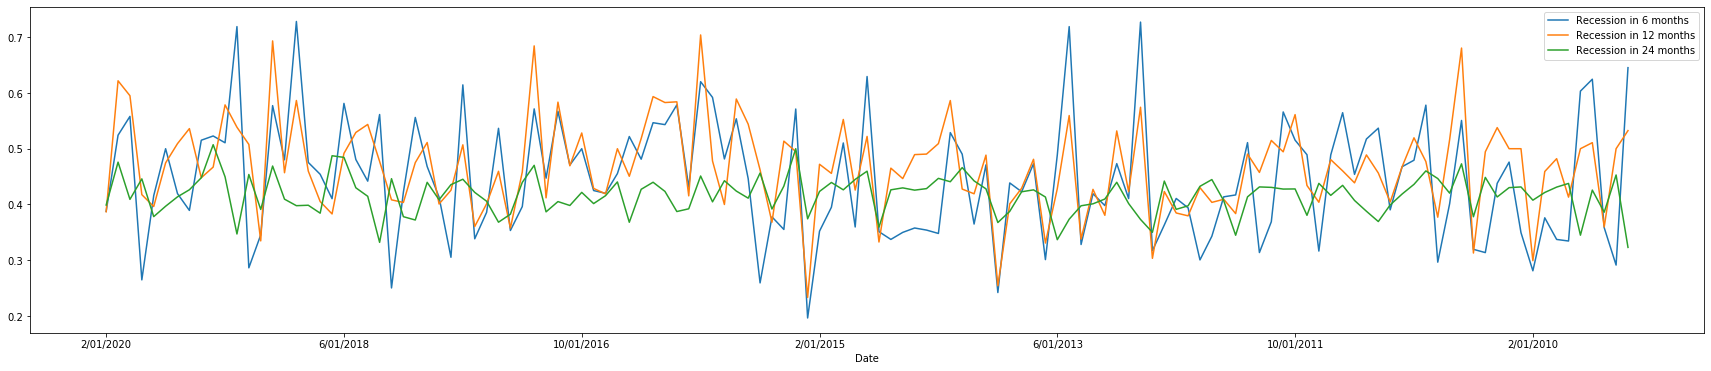

In [63]:
#visualizing

y = ['Recession in 6 months','Recession in 12 months','Recession in 24 months']

au_recession.plot('Date', y, figsize =(30, 6))